
Call:
lm(formula = y ~ x + I(x^2))

Coefficients:
(Intercept)            x       I(x^2)  
  8494.2414    -169.1676       0.8423  



ERROR: Error in solve.default(t(X) %*% X, t(X) %*% y): system is computationally singular: reciprocal condition number = 3.98642e-19


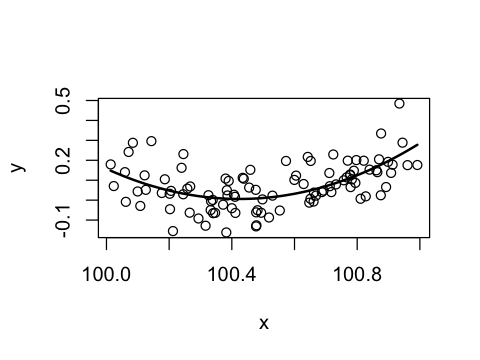

In [33]:
options(repr.plot.width = 4, repr.plot.height = 3)
#to reshape the picture output in browser

## First, simulate the data
set.seed(1)
x <- sort(runif(100)) + 100
y <- .2*(x-100 -.5)+(x-100 -.5)^2 + rnorm(100)*.1
#plot(x,y,type='l')
#lines(x,.2*(x-100 -.5)+(x-100 -.5)^2,col="red")
## lm manages to estimate the regression
plot(x,y)
b <- lm(y~x+I(x^2))
lines(x,fitted(b),lwd=2)
print(b)
## direct solution of the normal equations doesn't work
X <- model.matrix(b)
beta.hat <- solve(t(X)%*%X, t(X)%*%y)


In [32]:
## direct solution of the normal equations doesn't work
X <- model.matrix(b)
beta.hat <- solve(t(X)%*%X, t(X)%*%y)

ERROR: Error in solve.default(t(X) %*% X, t(X) %*% y): system is computationally singular: reciprocal condition number = 3.98642e-19



Call:
lm(formula = y ~ x1 + I(x1^2))

Coefficients:
(Intercept)           x1      I(x1^2)  
  -153.3320       0.1394           NA  




Call:
lm(formula = y ~ x1 + I(x1^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21618 -0.07203 -0.00513  0.05005  0.35350 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -153.33205   44.36638  -3.456 0.000812 ***
x1             0.13939    0.04031   3.458 0.000808 ***
I(x1^2)             NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1073 on 98 degrees of freedom
Multiple R-squared:  0.1087,	Adjusted R-squared:  0.09964 
F-statistic: 11.96 on 1 and 98 DF,  p-value: 0.0008075


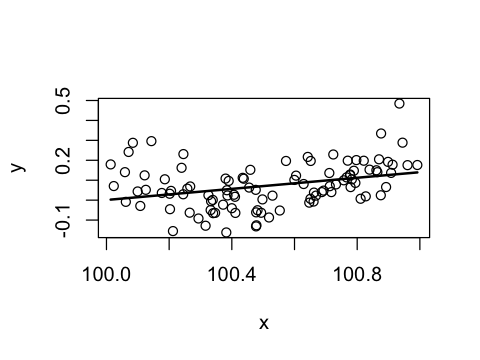

In [31]:
## What if the x-values were even further away from zero?
## In theory, this should still be able to represent the quadratic function.
x1 <- x+1000
plot(x,y)
b1 <- lm(y~x1+I(x1^2))
print(b1)
summary(b1)
lines(x,fitted(b1),lwd=2)
## lm fails without warning!


In [34]:
#Q1,condition number in these two cases
#ones=rep(1,length(x))
#X=cbind(ones,x,x^2)
X=model.matrix(b)
X1=model.matrix(b1)
#X1=cbind(ones,x1,x1^2)
#X2=model.matrix(b)
#X3=model.matrix(b1)
print("case1")
lambda=eigen(t(X)%*%X)
K=max(lambda$values)/min(lambda$values)
print("condition number via eigenvalue of XtX")
print(sqrt(K))

d <- svd(X)$d
print("condition number via svd")
C1=d[1]/d[3] ## manageable
print(C1)
#relative 
print("related error by eigen condition number and svd condition number")
print(sqrt(K)/(d[1]/d[3]))

print("case2")
lambda1=eigen(t(X1)%*%X1)
K1=max(lambda1$values)/min(lambda1$values)
print("condition number via eigenvalue of XtX")
print(sqrt(K1))

X1 <- model.matrix(b1)
d <- svd(X1)$d
print("condition number via svd")
C2=d[1]/d[3] ## very high
print(C2)
#relative
print("related error by eigen condition number and svd condition number")
print(sqrt(K1)/(d[1]/d[3]))

print("Condition number for case1 and case 2")
print(C1)
print(C2)

[1] "case1"
[1] "condition number via eigenvalue of XtX"
[1] 1416274472
[1] "condition number via svd"
[1] 1560769713
[1] "related error by eigen condition number and svd condition number"
[1] 0.9074205
[1] "case2"
[1] "condition number via eigenvalue of XtX"
[1] 89836612617
[1] "condition number via svd"
[1] 2.242481e+13
[1] "related error by eigen condition number and svd condition number"
[1] 0.004006127
[1] "Condition number for case1 and case 2"
[1] 1560769713
[1] 2.242481e+13


In [ ]:
1.The second case the condition number calculated by eigen value and the svd is very difference,K/K=0.0004, but in the case 1 is not that different, only 0.9074.-----> in this case, which is the "true" condition number?
2.The answer to why was the second lm fit so bad is that its condition number is too large, however, the first is about 1.560769713e+10, and the case2 is about 2.242481e+13, so how to determine the condition number is "really large"


use svd for xtx


#####cccccccccccccccccccccccccccccccccccccccccccccccccccccc


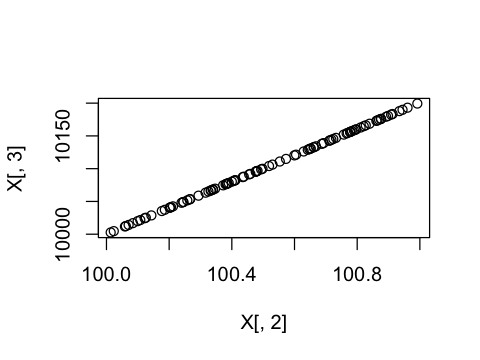

[1] 0.9999993
[1] 1


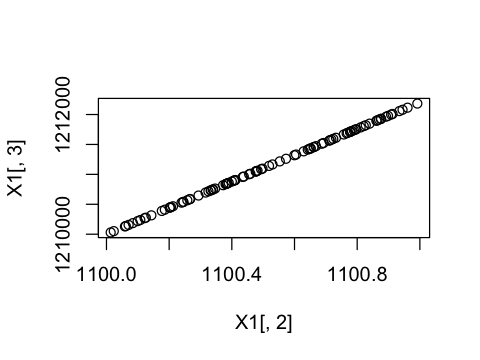

In [35]:
plot(X[,2],X[,3])
plot(X1[,2],X1[,3])
#almost the same, just move the X Y coordinages
print(cor(X[,2],X[,3]))
print(cor(X1[,2],X1[,3]))


In [25]:
cor(X,X1)

Warning message in cor(X, X1):
“the standard deviation is zero”

,(Intercept),x1,I(x1^2)
(Intercept),NA,NA,NA
x,NA,1.0000000,1.0000000
I(x^2),NA,0.9999993,0.9999994


#####(d)

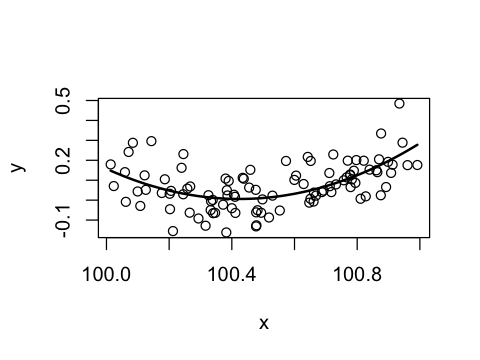

In [36]:
Xs <- X1
Xs[,2:3] <- sweep(Xs[,2:3],2, colMeans(Xs[,2:3]))
Xs[,2] <- Xs[,2]/sd(Xs[,2])
Xs[,3] <- Xs[,3]/sd(Xs[,3])
bs <- lm(y ~ Xs-1)
plot(x,y)
lines(x,fitted(bs),lwd=2)

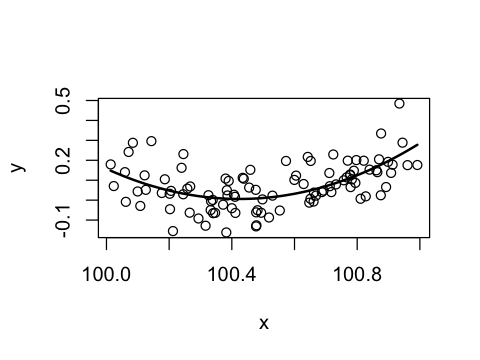

In [37]:
x2 <- x - mean(x)
b2 <- lm(y ~ x2 + I(x2^2))
plot(x,y)
lines(x,fitted(b2),lwd=2)